# Monte Carlo Simulation for FE
## IEOR 4703

### Market proxy models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Path generator function

In [2]:
def path_generator(p, trans_P):
    '''
    States:

    S_0: Head-biased
    S_1: Fair
    S_2: Tail-biased

    p1 & 1-p1
    0.5 & 0.5
    p2 & 1-p2
    '''

    # transition matrix from S_i to S_j
    T = np.array([[trans_P[0], 1. - trans_P[0], 0.],
                 [trans_P[1], 1. - trans_P[1] - trans_P[2], trans_P[2]],
                 [0., 1. - trans_P[3], trans_P[3]]])

    S = np.array([[p[0], 1. - p[0]],
                 [0.5, 0.5],
                 [p[1], 1. - p[1]]])

    n = 10000
    x = np.zeros(n)
    state = 1 # start at the fair state

    # Miao: should introduce Posssion here

    for j in range(n):
        # change state
        u = np.random.rand()
        if state == 0:
            if u > T[0, 0]:
                state = 1
        elif state == 1:
            if u < T[1, 0]:
                state = 0
            elif u > T[1, 0] + T[1, 1]:
                state = 2
        elif state == 2:
            if u > T[2, 2]:
                state = 1
        # heads or tails
        u = np.random.rand()
        if u < S[state, 0]:
            x[j] = np.abs(np.random.randn())
        else:
            x[j] = -np.abs(np.random.randn())

    y = np.cumsum(x)
    plt.plot(y)

    return y

### Transition matrix from $S_i$ to $S_j$

In [3]:
trans_P = np.array([0.8, 0.2, 0.2, 0.8])

### Pick a scenario

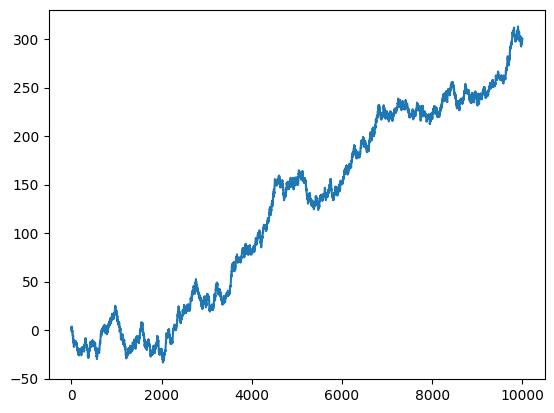

In [6]:
whichScenario = '1'

if whichScenario == '1':
    # up-trend
    p = np.array([0.6, 0.44])
elif whichScenario == '2':
    # down-trend
    p = np.array([0.6, 0.20])
elif whichScenario == '3':
    # mean-reversion
    p = np.array([0.7, 0.3])
else:
    # noisy
    p = np.array([0.9, 0.1])

x = path_generator(p, trans_P)